<a href="https://colab.research.google.com/github/MoronSlayer/Deep-Learning-Projects/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original explanation: https://neptune.ai/blog/how-to-code-bert-using-pytorch-tutorial              

In [1]:
text = (
       'Hello, how are you? I am Romeo.\n'
       'Hello, Romeo My name is Juliet. Nice to meet you.\n'
       'Nice meet you too. How are you today?\n'
       'Great. My baseball team won the competition.\n'
       'Oh Congratulations, Juliet\n'
       'Thanks you Romeo'
   )

In [4]:
import re

lowecasing the sentences and creating a vocabulary

In [5]:
sentences = re.sub("[.,!?\\-]", '', text.lower()).split('\n')  # filter '.', ',', '?', '!'
word_list = list(set(" ".join(sentences).split()))

In [12]:
sentences

['hello how are you i am romeo',
 'hello romeo my name is juliet nice to meet you',
 'nice meet you too how are you today',
 'great my baseball team won the competition',
 'oh congratulations juliet',
 'thanks you romeo']

In [13]:
word_list

['great',
 'too',
 'are',
 'baseball',
 'nice',
 'my',
 'you',
 'congratulations',
 'how',
 'won',
 'name',
 'thanks',
 'is',
 'today',
 'romeo',
 'meet',
 'team',
 'oh',
 'competition',
 'i',
 'am',
 'juliet',
 'to',
 'hello',
 'the']

In [11]:
list(enumerate(word_list))

[(0, 'great'),
 (1, 'too'),
 (2, 'are'),
 (3, 'baseball'),
 (4, 'nice'),
 (5, 'my'),
 (6, 'you'),
 (7, 'congratulations'),
 (8, 'how'),
 (9, 'won'),
 (10, 'name'),
 (11, 'thanks'),
 (12, 'is'),
 (13, 'today'),
 (14, 'romeo'),
 (15, 'meet'),
 (16, 'team'),
 (17, 'oh'),
 (18, 'competition'),
 (19, 'i'),
 (20, 'am'),
 (21, 'juliet'),
 (22, 'to'),
 (23, 'hello'),
 (24, 'the')]

In [9]:
word_dicts = {'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3}
for i, w in enumerate(word_list):
   word_dicts[w] = i + 4
   print(word_dicts)
   number_dict = {i: w for i, w in enumerate(word_dict)}
   vocab_size = len(word_dict)

{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6, 'baseball': 7}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6, 'baseball': 7, 'nice': 8}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6, 'baseball': 7, 'nice': 8, 'my': 9}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6, 'baseball': 7, 'nice': 8, 'my': 9, 'you': 10}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6, 'baseball': 7, 'nice': 8, 'my': 9, 'you': 10, 'congratulations': 11}
{'[PAD]': 0, '[CLS]': 1, '[SEP]': 2, '[MASK]': 3, 'great': 4, 'too': 5, 'are': 6, 'baseball': 7, 'nice': 8, 'my': 9, 'you': 10, 'congratulations': 11, 'how': 12}
{'[PAD]': 0, '[CLS]':

In [8]:
word_dict

{'[PAD]': 0,
 '[CLS]': 1,
 '[SEP]': 2,
 '[MASK]': 3,
 'great': 4,
 'too': 5,
 'are': 6,
 'baseball': 7,
 'nice': 8,
 'my': 9,
 'you': 10,
 'congratulations': 11,
 'how': 12,
 'won': 13,
 'name': 14,
 'thanks': 15,
 'is': 16,
 'today': 17,
 'romeo': 18,
 'meet': 19,
 'team': 20,
 'oh': 21,
 'competition': 22,
 'i': 23,
 'am': 24,
 'juliet': 25,
 'to': 26,
 'hello': 27,
 'the': 28}

In [7]:
number_dict

{0: '[PAD]',
 1: '[CLS]',
 2: '[SEP]',
 3: '[MASK]',
 4: 'great',
 5: 'too',
 6: 'are',
 7: 'baseball',
 8: 'nice',
 9: 'my',
 10: 'you',
 11: 'congratulations',
 12: 'how',
 13: 'won',
 14: 'name',
 15: 'thanks',
 16: 'is',
 17: 'today',
 18: 'romeo',
 19: 'meet',
 20: 'team',
 21: 'oh',
 22: 'competition',
 23: 'i',
 24: 'am',
 25: 'juliet',
 26: 'to',
 27: 'hello',
 28: 'the'}

a function that formats the input sequences for three types of embeddings: token embedding, segment embedding, and position embedding

Token embedding: 


---


if the sentence is “The cat is walking. The dog is barking”, then the function should create a sequence in the following manner: “[CLS] the cat is walking [SEP] the dog is barking”

Segment embedding:


---


if the sentence is “The cat is walking. The dog is barking”, then the function should create a sequence in the following manner: “[CLS] the cat is walking [SEP] the dog is barking”

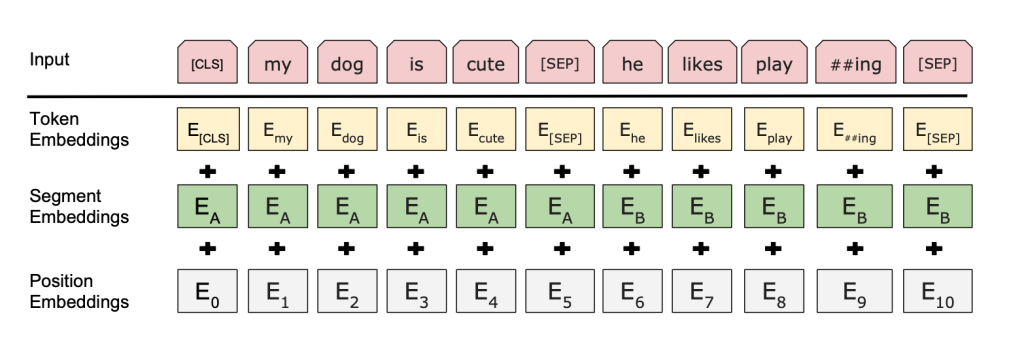

In the masking phase, padding is added to make sentences of equal length. 

“The cat is walking. The dog is barking at the tree” 

“[CLS] The cat is walking [PAD] [PAD] [PAD]. [CLS] The dog is barking at the tree.”